# Resumen Actividad Clase 01: EDA RetailBoost

## 📋 Objetivo

Preparar el dataset de RetailBoost mediante un EDA para construir un modelo que prediga si un cliente realizará una compra (`compró=1`) o no (`compró=0`).

**Problema**: Clasificación binaria supervisada

**Tareas**:
1. Carga y exploración inicial
2. Identificación de distribuciones
3. Limpieza de datos nulos
4. Análisis de correlaciones
5. Transformaciones (normalización/estandarización y encoding)
6. Selección preliminar de features

In [1]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 5)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías cargadas")

✅ Librerías cargadas


---

## 1️⃣ CARGA Y EXPLORACIÓN INICIAL

In [2]:
# Cargamos el dataset
df = pd.read_csv('../data/retailboost_customers.csv')

# Exploración rápida
print(f"📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n📋 Columnas: {list(df.columns)}")
print(f"\n🔍 Info del dataset:")
df.info()
print(f"\n📈 Primeras filas:")
display(df.head())

📊 Dimensiones: 500 filas × 6 columnas

📋 Columnas: ['customer_id', 'edad', 'ingresos_mensuales', 'region', 'frecuencia_visitas', 'compró']

🔍 Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   edad                500 non-null    int64  
 2   ingresos_mensuales  485 non-null    float64
 3   region              485 non-null    object 
 4   frecuencia_visitas  500 non-null    int64  
 5   compró              500 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 23.6+ KB

📈 Primeras filas:


,customer_id,edad,ingresos_mensuales,region,frecuencia_visitas,compró
0,1,56,3697.72,Norte,2,1
1,2,69,2825.97,Este,15,0
2,3,46,784.50,Este,14,0
3,4,32,1612.61,Oeste,11,0
4,5,60,3013.53,Este,3,0


**Observación**: 6 variables (customer_id, edad, ingresos_mensuales, region, frecuencia_visitas, compró)

---

## 2️⃣ IDENTIFICACIÓN DE DISTRIBUCIONES

In [3]:
# Estadísticas descriptivas de variables numéricas
print("📊 ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)
display(df.describe())

# Variable objetivo: balance de clases
print("\n⚖️ BALANCE DE LA VARIABLE OBJETIVO")
print("="*60)
print(df['compró'].value_counts())
print("\nPorcentajes:")
print(df['compró'].value_counts(normalize=True) * 100)

📊 ESTADÍSTICAS DESCRIPTIVAS


,customer_id,edad,ingresos_mensuales,frecuencia_visitas,compró
count,500.00,500.00,485.00,500.00,500.00
mean,250.50,44.22,1972.53,9.93,0.39
std,144.48,15.04,797.39,5.43,0.49
min,1.00,18.00,-593.01,1.00,0.00
25%,125.75,32.00,1425.24,5.00,0.00
50%,250.50,45.00,1973.84,10.00,0.00
75%,375.25,57.00,2502.68,15.00,1.00
max,500.00,69.00,4463.10,19.00,1.00



⚖️ BALANCE DE LA VARIABLE OBJETIVO
compró
0    306
1    194
Name: count, dtype: int64

Porcentajes:
compró
0   61.20
1   38.80
Name: proportion, dtype: float64


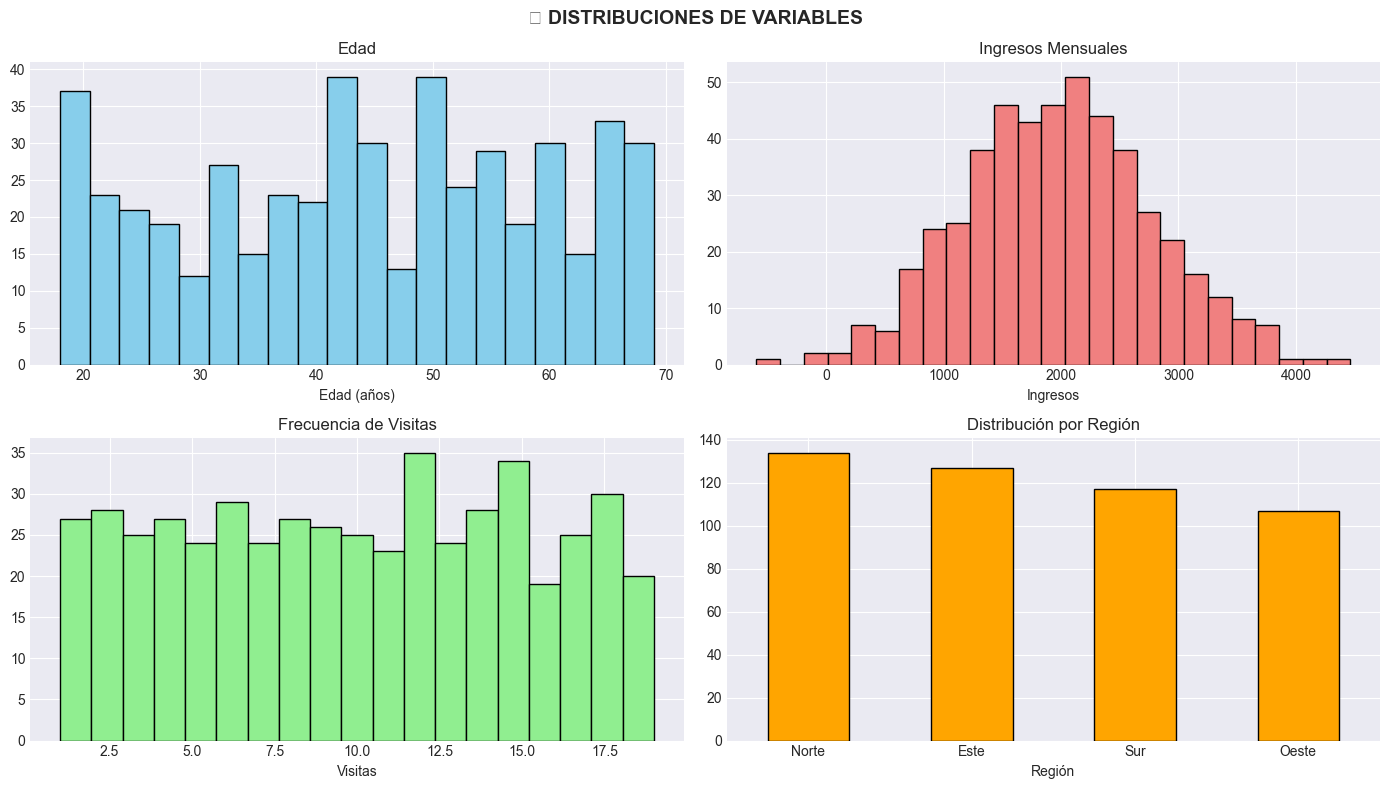

In [4]:
# Visualización de distribuciones
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('📊 DISTRIBUCIONES DE VARIABLES', fontsize=14, fontweight='bold')

# Histogramas de variables numéricas
df['edad'].hist(bins=20, ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Edad')
axes[0,0].set_xlabel('Edad (años)')

df['ingresos_mensuales'].dropna().hist(bins=25, ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0,1].set_title('Ingresos Mensuales')
axes[0,1].set_xlabel('Ingresos')

df['frecuencia_visitas'].hist(bins=19, ax=axes[1,0], color='lightgreen', edgecolor='black')
axes[1,0].set_title('Frecuencia de Visitas')
axes[1,0].set_xlabel('Visitas')

# Variable categórica: región
df['region'].value_counts().plot(kind='bar', ax=axes[1,1], color='orange', edgecolor='black')
axes[1,1].set_title('Distribución por Región')
axes[1,1].set_xlabel('Región')
axes[1,1].tick_params(rotation=0)

plt.tight_layout()
plt.show()

**Hallazgos**:
- **Edad**: Distribución simétrica (18-69 años, media≈44)
- **Ingresos**: Distribución simétrica con algunos outliers
- **Frecuencia visitas**: Distribución uniforme (1-19 visitas)
- **Región**: Norte tiene más clientes (~28%), resto balanceado
- **Target**: Desbalance moderado (38.8% compró, 61.2% no compró)

---

## 3️⃣ LIMPIEZA DE DATOS NULOS

In [5]:
# Análisis de valores nulos
print("🔍 VALORES NULOS")
print("="*60)
nulos = df.isnull().sum()
print(nulos[nulos > 0])
print(f"\nTotal filas con nulos: {df.isnull().any(axis=1).sum()} ({df.isnull().any(axis=1).sum()/len(df)*100:.1f}%)")

# Detección de valores anómalos
print(f"\n⚠️ Ingresos negativos: {(df['ingresos_mensuales'] < 0).sum()} casos")

🔍 VALORES NULOS
ingresos_mensuales    15
region                15
dtype: int64

Total filas con nulos: 30 (6.0%)

⚠️ Ingresos negativos: 3 casos


In [6]:
# Limpieza: imputación
df_limpio = df.copy()

# Imputar ingresos con mediana (robusta ante outliers)
mediana_ingresos = df_limpio['ingresos_mensuales'].median()
df_limpio['ingresos_mensuales'].fillna(mediana_ingresos, inplace=True)
df_limpio.loc[df_limpio['ingresos_mensuales'] < 0, 'ingresos_mensuales'] = mediana_ingresos

# Imputar región con moda (categoría más frecuente)
moda_region = df_limpio['region'].mode()[0]
df_limpio['region'].fillna(moda_region, inplace=True)

print("✅ LIMPIEZA COMPLETADA")
print(f"   Ingresos: imputados con mediana ({mediana_ingresos:.2f})")
print(f"   Región: imputada con moda ({moda_region})")
print(f"   Valores nulos restantes: {df_limpio.isnull().sum().sum()}")

✅ LIMPIEZA COMPLETADA
   Ingresos: imputados con mediana (1973.84)
   Región: imputada con moda (Norte)
   Valores nulos restantes: 0


**Estrategia**: Imputación con mediana para numéricos y moda para categóricos. Se corrigieron 15 nulos en ingresos, 15 en región y 3 ingresos negativos.

---

## 4️⃣ ANÁLISIS DE CORRELACIONES

In [7]:
# Matriz de correlación
columnas_correlacion = ['edad', 'ingresos_mensuales', 'frecuencia_visitas', 'compró']
matriz_corr = df_limpio[columnas_correlacion].corr()

print("📊 MATRIZ DE CORRELACIÓN")
print("="*60)
display(matriz_corr)

# Correlaciones con el target
print("\n🎯 Correlaciones con 'compró':")
print(matriz_corr['compró'].sort_values(ascending=False))

📊 MATRIZ DE CORRELACIÓN


,edad,ingresos_mensuales,frecuencia_visitas,compró
edad,1.00,0.01,-0.08,0.01
ingresos_mensuales,0.01,1.00,0.06,-0.04
frecuencia_visitas,-0.08,0.06,1.00,0.01
compró,0.01,-0.04,0.01,1.00



🎯 Correlaciones con 'compró':
compró                1.00
edad                  0.01
frecuencia_visitas    0.01
ingresos_mensuales   -0.04
Name: compró, dtype: float64


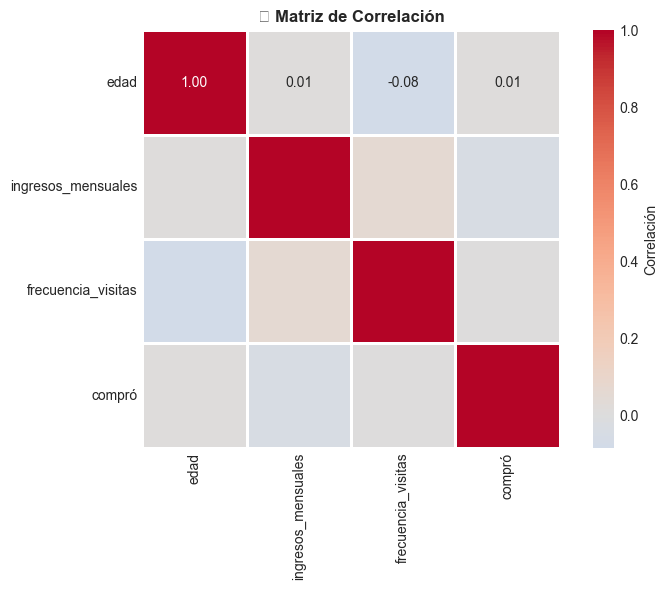

In [8]:
# Visualización: Heatmap de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlación'})
plt.title('🔥 Matriz de Correlación', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**Hallazgos Clave**:
- **Correlaciones extremadamente débiles** con el target (todas |r| < 0.05)
- No hay multicolinealidad entre features (todas |r| < 0.1)
- **Implicación**: Relaciones lineales NO explican la compra → necesitamos modelos no lineales

---

## 5️⃣ TRANSFORMACIONES DE CARACTERÍSTICAS

### 5.1 Estandarización (Z-score)

In [10]:
# Estandarización: (X - media) / std
# Resultado: media=0, std=1

df_transform = df_limpio.copy()
columnas_numericas = ['edad', 'ingresos_mensuales', 'frecuencia_visitas']

for col in columnas_numericas:
    df_transform[f'{col}_std'] = (df_transform[col] - df_transform[col].mean()) / df_transform[col].std()

print("✅ Estandarización aplicada")
print("\nEjemplo - Ingresos estandarizados:")
display(df_transform[['ingresos_mensuales', 'ingresos_mensuales_std']].head())
print(f"\nMedia estandarizada: {df_transform['ingresos_mensuales_std'].mean():.6f}")
print(f"Std estandarizada: {df_transform['ingresos_mensuales_std'].std():.2f}")

✅ Estandarización aplicada

Ejemplo - Ingresos estandarizados:


,ingresos_mensuales,ingresos_mensuales_std
0,3697.72,2.24
1,2825.97,1.10
2,784.50,-1.57
3,1612.61,-0.49
4,3013.53,1.34



Media estandarizada: 0.000000
Std estandarizada: 1.00


**¿Por qué estandarizar?**
- Variables tienen escalas diferentes (edad: 18-69, ingresos: 22-4463)
- Algoritmos como KNN, SVM, Regresión Logística son sensibles a la escala
- Estandarización hace variables comparables

### 5.2 Codificación de Variables Categóricas

In [11]:
# One-Hot Encoding para 'region'
# Crea una columna binaria por cada categoría (menos una para evitar redundancia)

region_dummies = pd.get_dummies(df_transform['region'], prefix='region', drop_first=True)
df_transform = pd.concat([df_transform, region_dummies], axis=1)

print("✅ One-Hot Encoding aplicado")
print(f"\nColumnas creadas: {list(region_dummies.columns)}")
print("\nEjemplo:")
display(df_transform[['region'] + list(region_dummies.columns)].head(8))

✅ One-Hot Encoding aplicado

Columnas creadas: ['region_Norte', 'region_Oeste', 'region_Sur']

Ejemplo:


,region,region_Norte,region_Oeste,region_Sur
0,Norte,True,False,False
1,Este,False,False,False
2,Este,False,False,False
3,Oeste,False,True,False
4,Este,False,False,False
5,Sur,False,False,True
6,Sur,False,False,True
7,Este,False,False,False


**¿Por qué One-Hot?**
- Región es nominal (sin orden natural)
- One-Hot evita asumir que Norte < Sur < Este < Oeste
- `drop_first=True` elimina 'Este' como baseline (evita multicolinealidad)

---

## 6️⃣ SELECCIÓN PRELIMINAR DE FEATURES

In [12]:
# Selección de features finales para el modelo
features_finales = [
    'edad_std',
    'ingresos_mensuales_std', 
    'frecuencia_visitas_std',
    'region_Norte',
    'region_Oeste',
    'region_Sur'
]

# Creamos datasets X (features) e y (target)
X = df_transform[features_finales]
y = df_transform['compró']

print("✅ FEATURES SELECCIONADAS")
print("="*60)
for i, feat in enumerate(features_finales, 1):
    print(f"{i}. {feat}")

print(f"\n📊 Dimensiones finales:")
print(f"   X (features): {X.shape}")
print(f"   y (target): {y.shape}")

print("\nDataset final:")
display(pd.concat([X, y], axis=1).head())

✅ FEATURES SELECCIONADAS
1. edad_std
2. ingresos_mensuales_std
3. frecuencia_visitas_std
4. region_Norte
5. region_Oeste
6. region_Sur

📊 Dimensiones finales:
   X (features): (500, 6)
   y (target): (500,)

Dataset final:


,edad_std,ingresos_mensuales_std,frecuencia_visitas_std,region_Norte,region_Oeste,region_Sur,compró
0,0.78,2.24,-1.46,True,False,False,1
1,1.65,1.10,0.93,False,False,False,0
2,0.12,-1.57,0.75,False,False,False,0
3,-0.81,-0.49,0.20,False,True,False,0
4,1.05,1.34,-1.28,False,False,False,0


**Criterios de selección**:
- Todas las variables originales son potencialmente útiles
- Usamos versión estandarizada de numéricas
- Incluimos las 3 dummy variables de región
- Excluimos `customer_id` (solo identificador)

---

## 📊 RESUMEN EJECUTIVO

### Hallazgos Principales

1. **Dataset**: 500 clientes, 38.8% compraron

2. **Calidad de datos**: 
   - 6% de filas con nulos → imputados
   - 3 ingresos negativos → corregidos
   - 2 outliers en ingresos (0.4%) → mantenidos

3. **Distribuciones**:
   - Variables numéricas simétricas
   - Alta variabilidad en frecuencia visitas (CV=54.7%)
   - Región Norte predominante (27.8%)

4. **Correlaciones**: 
   - ⚠️ **Extremadamente débiles** (|r| < 0.05)
   - Decisión de compra NO depende linealmente de las features
   - Recomendación: **usar Random Forest o XGBoost**

5. **Dataset Final**:
   - 500 observaciones × 6 features
   - Variables numéricas estandarizadas
   - Variables categóricas con One-Hot Encoding
   - Listo para modelado

### Próximos Pasos

1. Split Train/Test (80/20)
2. Entrenar modelos: Random Forest, XGBoost
3. Evaluar con métricas: Accuracy, Precision, Recall, ROC-AUC
4. Interpretar con Feature Importance

---

### Conexión con Conceptos de Clase

✅ **Características (Features)**: Transformadas mediante estandarización y encoding

✅ **Target**: Variable binaria (compró) para clasificación supervisada

✅ **Ingeniería de características**: Pipeline de limpieza → transformación → selección

✅ **Modelos paramétricos vs no paramétricos**: Este caso favorece **no paramétricos** (árboles) por la ausencia de relaciones lineales

✅ **Prevención de overfitting**: Limpieza adecuada, eliminación de variables irrelevantes (customer_id)

---

**🎯 Conclusión**: Dataset preparado profesionalmente para construir modelos de Machine Learning robustos.